# Simulated adaptive quality control chart

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import math

In [4]:
i = 1
n =  5
seed_count = 1
pw = 0.84 # warning limit
nw = -0.84 # waring limit
# Empty list
time_sum = list()
x_bar_summary = list()
z = list()
sample_num = list()

while i <= 24: #time is from 0 hour to 24 hour
    np.random.seed(seed_count)
    sandwich = pd.Series(np.random.normal(loc = 10 + (i/11), scale = 2, size = 1000)) # mean shift
    sample_sandwich = random.choices(sandwich, k = n)

    x_bar = sum(sample_sandwich) / len(sample_sandwich)  # mean of n subway bread
    std = statistics.pstdev(sample_sandwich)   # standard deviation of n subway bread
    z_value = (x_bar - 10) / (std / math.sqrt(n))
    
    time_sum.append(i)
    x_bar_summary.append(x_bar)
    z.append(z_value)
    sample_num.append(n)

    if z_value < pw and z_value > nw:
        i = i + 1.75
        n = 3
        seed_count = seed_count + 1
    else:
        i = i + 0.25
        n = 8
        seed_count = seed_count + 1

In [6]:
# Create the empty data frame
df = pd.DataFrame()
df['time'] = time_sum
df['sample size'] = sample_num
df['x_bar'] = x_bar_summary
df['z'] = z

df.head(10)

,time,sample size,x_bar,z
0,1.00,5,10.286297,0.289214
1,2.75,3,11.418166,2.245720
2,3.00,8,10.530075,0.576494
3,4.75,3,10.026881,0.039610
4,6.50,3,12.194380,2.542161
5,6.75,8,10.117336,0.236874
6,8.50,3,11.248952,1.635963
7,8.75,8,11.063225,2.025661
8,9.00,8,10.389347,0.465658
9,10.75,3,11.109592,3.748893


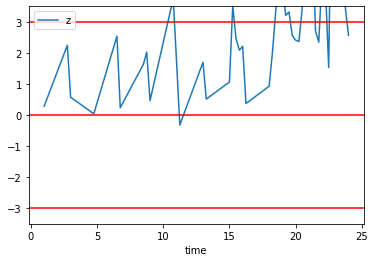

In [7]:
#plot the time and z on the chart
result = df.plot(x = "time", y = "z", kind = "line")
result.set_ylim([-3.5, 3.5])
result.axhline(y = 0, color = 'red', linestyle = '-')
result.axhline(y = -3, color = 'red', linestyle = '-')
result.axhline(y = 3, color = 'red', linestyle = '-')